<a href="https://colab.research.google.com/github/Edwin159x/Tareas-PCD/blob/main/Guia3final/Gu%C3%ADa_nro_3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seccion de Introducción**

## **Contexto empresarial**

**¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**


La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).
La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

## **Problema comercial**

Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## **Contexto analítico**

Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

## Overview de la data

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.



# **Seccion de Alistamiento de los Datos**

## **Review del  Dataset**

In [ ]:
from google.colab import drive
import os , shutil
#--------------------------------------------------------------------------------------------------------------------------------------------

os.chdir('/content/')  # Establecer la ruta de trabajo por defecto.
drive.mount('/content/drive') # Montaje de la Carpeta Drive para poder acceder a los Archivos del Drive Directamente, para la primera ejecución hay que dar permisos sobre el Drive.
strFile ='accidents-1.csv' # Nombre del Archivo a trabajar en el proyecto
strPathTrabajo = os.getcwd()+"/P_CD/Guia_3/" # Path de Trabajo para el Resto del Proyecto
strPathOrigen = os.getcwd()+"/drive/MyDrive/Colab Notebooks/"+strFile  # Path Origen del Archivo de Trabajo que es Drive
strPathDestino = strPathTrabajo + strFile # Estructuracion de la ruta para Deposito del archvo de trabajo.
#--------------------------------------------------------------------------------------------------------------------------------------------
# Validacion de Existencia de la Carpeta Destino del proyecto
if os.path.exists(strPathTrabajo) == True:
  shutil.rmtree(strPathTrabajo) # Eliminacion de la Carperta  si existe y  todo Su Contenido
os.makedirs(strPathTrabajo, exist_ok=True) # Creación carpeta de trabajo
os.chdir(strPathTrabajo) # establecer la carpeta de Trabajo para el proyecto
#--------------------------------------------------------------------------------------------------------------------------------------------
shutil.copy(strPathOrigen, strPathDestino)  # Copia el archivo
print("La nueva ruta de Trabajo para el Proyetco es: ", strPathTrabajo , "con los Siguientes Archvos contenidos : " , os.listdir(strPathTrabajo))
#--------------------------------------------------------------------------------------------------------------------------------------------

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
La nueva ruta de Trabajo para el Proyetco es:  /content/P_CD/Guia_3/ con los Siguientes Archvos contenidos :  ['accidents-1.csv']


In [ ]:
import pandas as pd

df = pd.read_csv(strFile , sep=";") # Carga de Set de Datos.
df.columns = df.columns.str.replace(" ", "_")

Registros , Variables = df.shape
print(f"El Set de Datos tiene {Registros} Registros y {Variables} Variables")

El Set de Datos tiene 238522 Registros y 24 Variables


In [ ]:
print(f"Los Tipos de Datos de las {Variables} columnas/variables que contiene el df son las Siguientes:")
print(df.dtypes)

Los Tipos de Datos de las 24 columnas/variables que contiene el df son las Siguientes:
DATE                              object
TIME                              object
BOROUGH                           object
ZIP_CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
ON_STREET_NAME                    object
NUMBER_OF_PEDESTRIANS_INJURED      int64
NUMBER_OF_PEDESTRIANS_KILLED       int64
NUMBER_OF_CYCLIST_INJURED          int64
NUMBER_OF_CYCLIST_KILLED           int64
NUMBER_OF_MOTORIST_INJURED         int64
NUMBER_OF_MOTORIST_KILLED          int64
CONTRIBUTING_FACTOR_VEHICLE_1     object
CONTRIBUTING_FACTOR_VEHICLE_2     object
CONTRIBUTING_FACTOR_VEHICLE_3     object
CONTRIBUTING_FACTOR_VEHICLE_4     object
CONTRIBUTING_FACTOR_VEHICLE_5     object
COLLISION_ID                       int64
VEHICLE_TYPE_CODE_1               object
VEHICLE_TYPE_CODE_2               object
VEHICLE_TYPE_CODE_3               object
VEHICLE_TYP

In [ ]:
print("Cantidad de Variables por Tipo de dato")
print(df.dtypes.value_counts())

Cantidad de Variables por Tipo de dato
object     14
int64       7
float64     3
Name: count, dtype: int64


In [ ]:
print("Verificación de valores ausentes en el Set de Datos")
df.info()

Verificación de valores ausentes en el Set de Datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP_CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON_STREET_NAME                 153918 non-null  object 
 7   NUMBER_OF_PEDESTRIANS_INJURED  238522 non-null  int64  
 8   NUMBER_OF_PEDESTRIANS_KILLED   238522 non-null  int64  
 9   NUMBER_OF_CYCLIST_INJURED      238522 non-null  int64  
 10  NUMBER_OF_CYCLIST_KILLED       238522 non-null  int64  
 11  NUMBER_OF_MOTORIST_INJURED     238522 n

In [ ]:
df["COLLISION_ID"].count()

238522

In [ ]:
len(df["COLLISION_ID"].unique())

238522

In [ ]:
df.groupby("BOROUGH").count()["COLLISION_ID"]

,COLLISION_ID
BOROUGH,
BRONX,37709
BROOKLYN,76253
MANHATTAN,48749
QUEENS,67120
STATEN ISLAND,8691


In [ ]:
df["CONTRIBUTING_FACTOR_VEHICLE_1"].value_counts()

,count
CONTRIBUTING_FACTOR_VEHICLE_1,
Unspecified,59307
Driver Inattention/Distraction,58551
Failure to Yield Right-of-Way,18236
Following Too Closely,15370
Backing Unsafely,13876
Passing Too Closely,11337
Passing or Lane Usage Improper,10469
Other Vehicular,7509
Turning Improperly,6043


## **Limpieza del dataset**

Aquí nos aseguramos que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos.

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato.

* para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH.
* En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio.
* La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía.
* Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified".
* Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [ ]:
# Para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH.
df_Mod1 = df.copy()
for Municipio in df["BOROUGH"].unique():
    print(Municipio)
    dfFil = df_Mod1["BOROUGH"] == Municipio
    df_Mod1.loc[dfFil, 'ZIP_CODE'] = df_Mod1.loc[dfFil, 'ZIP_CODE'].fillna(df_Mod1.loc[dfFil, 'ZIP_CODE'].mode().iloc[0])

BRONX
BROOKLYN
QUEENS
MANHATTAN
STATEN ISLAND


In [ ]:
df[["BOROUGH","ZIP_CODE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   BOROUGH   238522 non-null  object 
 1   ZIP_CODE  238452 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.6+ MB


In [ ]:
df_Mod1[["BOROUGH","ZIP_CODE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   BOROUGH   238522 non-null  object 
 1   ZIP_CODE  238522 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.6+ MB


In [ ]:
df_Mod1.groupby(["BOROUGH","ZIP_CODE"]).value_counts()

BOROUGH        ZIP_CODE  DATE        TIME   LATITUDE   LONGITUDE   ON_STREET_NAME                    NUMBER_OF_PEDESTRIANS_INJURED  NUMBER_OF_PEDESTRIANS_KILLED  NUMBER_OF_CYCLIST_INJURED  NUMBER_OF_CYCLIST_KILLED  NUMBER_OF_MOTORIST_INJURED  NUMBER_OF_MOTORIST_KILLED  CONTRIBUTING_FACTOR_VEHICLE_1   CONTRIBUTING_FACTOR_VEHICLE_2  CONTRIBUTING_FACTOR_VEHICLE_3  CONTRIBUTING_FACTOR_VEHICLE_4  CONTRIBUTING_FACTOR_VEHICLE_5  COLLISION_ID  VEHICLE_TYPE_CODE_1                  VEHICLE_TYPE_CODE_2                  VEHICLE_TYPE_CODE_3                  VEHICLE_TYPE_CODE_4                  VEHICLE_TYPE_CODE_5                
BRONX          10451.0   06/27/2018  9:38   40.823456  -73.924440  GRAND CONCOURSE                   0                              0                             0                          0                         0                           0                          Alcohol Involvement             Unspecified                    Unspecified                    Unspecified                    Unspecified                    3930357       Sedan                                Sedan                                Sedan                                Station Wagon/Sport Utility Vehicle  Sedan                                  1
               10452.0   01/26/2018  14:10  40.841347  -73.916900  JEROME AVENUE                     0                              0                             0                          0                         2                           0                          Unsafe Speed                    Unspecified                    Unspecified                    Unspecified                    Unspecified                    3838720       TAXI                                 TAXI                                 PASSENGER VEHICLE                    PASSENGER VEHICLE                    PASSENGER VEHICLE                      1
                         05/10/2018  11:25  40.831974  -73.923500  RIVER AVENUE                      0                              0                             0                          0                         1                           0                          Traffic Control Disregarded     Unsafe Speed                   Unspecified                    Unspecified                    Unspecified                    3898089       Sedan                                Sedan                                Sedan                                Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle    1
                         05/11/2019  3:10   40.843304  -73.919190  WEST 172 STREET                   0                              0                             0                          0                         0                           0                          Pavement Slippery               Unspecified                    Unspecified                    Unspecified                    Unspecified                    4130126       Sedan                                Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle  Sedan                                Station Wagon/Sport Utility Vehicle    1
                         08/07/2018  2:15   40.833633  -73.926150  ANDERSON AVENUE                   0                              0                             0                          0                         0                           0                          Unsafe Speed                    Unspecified                    Unspecified                    Unspecified                    Unspecified                    3956496       Sedan                                Station Wagon/Sport Utility Vehicle  Motorcycle                           Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle    1
                                                                                                                                                                                                                                       

In [ ]:
# En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio.
df_Mod2 = df_Mod1.copy()
for Municipio in df["BOROUGH"].unique():
    dfFil = df_Mod2["BOROUGH"] == Municipio
    df_Mod2.loc[dfFil, 'LATITUDE'] = df_Mod2.loc[dfFil, 'LATITUDE'].fillna(df_Mod2.loc[dfFil, 'LATITUDE'].median())
    df_Mod2.loc[dfFil, 'LONGITUDE'] = df_Mod2.loc[dfFil, 'LONGITUDE'].fillna(df_Mod2.loc[dfFil, 'LONGITUDE'].median())

In [ ]:
df[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   BOROUGH    238522 non-null  object 
 1   ZIP_CODE   238452 non-null  float64
 2   LATITUDE   231544 non-null  float64
 3   LONGITUDE  231544 non-null  float64
dtypes: float64(3), object(1)
memory usage: 7.3+ MB


In [ ]:
df_Mod2[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   BOROUGH    238522 non-null  object 
 1   ZIP_CODE   238522 non-null  float64
 2   LATITUDE   238522 non-null  float64
 3   LONGITUDE  238522 non-null  float64
dtypes: float64(3), object(1)
memory usage: 7.3+ MB


In [ ]:
# La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía.
df_Mod3 = df_Mod2.copy()
df_Mod3.loc[:, 'ON_STREET_NAME'] = df_Mod3['ON_STREET_NAME'].fillna("UNKNOWN")

In [ ]:
df[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE","ON_STREET_NAME"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BOROUGH         238522 non-null  object 
 1   ZIP_CODE        238452 non-null  float64
 2   LATITUDE        231544 non-null  float64
 3   LONGITUDE       231544 non-null  float64
 4   ON_STREET_NAME  153918 non-null  object 
dtypes: float64(3), object(2)
memory usage: 9.1+ MB


In [ ]:
df_Mod3[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE","ON_STREET_NAME"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BOROUGH         238522 non-null  object 
 1   ZIP_CODE        238522 non-null  float64
 2   LATITUDE        238522 non-null  float64
 3   LONGITUDE       238522 non-null  float64
 4   ON_STREET_NAME  238522 non-null  object 
dtypes: float64(3), object(2)
memory usage: 9.1+ MB


In [ ]:
# Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified".
df_Mod4 = df_Mod3.copy()
for i in range(1, 6):
    df_Mod4.loc[:, 'CONTRIBUTING_FACTOR_VEHICLE_'+str(i)] = df_Mod4['CONTRIBUTING_FACTOR_VEHICLE_'+str(i)].fillna("Unspecified")

In [ ]:
df[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE","ON_STREET_NAME","CONTRIBUTING_FACTOR_VEHICLE_1","CONTRIBUTING_FACTOR_VEHICLE_2","CONTRIBUTING_FACTOR_VEHICLE_3","CONTRIBUTING_FACTOR_VEHICLE_4","CONTRIBUTING_FACTOR_VEHICLE_5"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BOROUGH                        238522 non-null  object 
 1   ZIP_CODE                       238452 non-null  float64
 2   LATITUDE                       231544 non-null  float64
 3   LONGITUDE                      231544 non-null  float64
 4   ON_STREET_NAME                 153918 non-null  object 
 5   CONTRIBUTING_FACTOR_VEHICLE_1  237638 non-null  object 
 6   CONTRIBUTING_FACTOR_VEHICLE_2  198514 non-null  object 
 7   CONTRIBUTING_FACTOR_VEHICLE_3  13072 non-null   object 
 8   CONTRIBUTING_FACTOR_VEHICLE_4  2856 non-null    object 
 9   CONTRIBUTING_FACTOR_VEHICLE_5  792 non-null     object 
dtypes: float64(3), object(7)
memory usage: 18.2+ MB


In [ ]:
df_Mod4[["BOROUGH","ZIP_CODE","LATITUDE","LONGITUDE","ON_STREET_NAME","CONTRIBUTING_FACTOR_VEHICLE_1","CONTRIBUTING_FACTOR_VEHICLE_2","CONTRIBUTING_FACTOR_VEHICLE_3","CONTRIBUTING_FACTOR_VEHICLE_4","CONTRIBUTING_FACTOR_VEHICLE_5"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BOROUGH                        238522 non-null  object 
 1   ZIP_CODE                       238522 non-null  float64
 2   LATITUDE                       238522 non-null  float64
 3   LONGITUDE                      238522 non-null  float64
 4   ON_STREET_NAME                 238522 non-null  object 
 5   CONTRIBUTING_FACTOR_VEHICLE_1  238522 non-null  object 
 6   CONTRIBUTING_FACTOR_VEHICLE_2  238522 non-null  object 
 7   CONTRIBUTING_FACTOR_VEHICLE_3  238522 non-null  object 
 8   CONTRIBUTING_FACTOR_VEHICLE_4  238522 non-null  object 
 9   CONTRIBUTING_FACTOR_VEHICLE_5  238522 non-null  object 
dtypes: float64(3), object(7)
memory usage: 18.2+ MB


In [ ]:
# Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.
df_Final = df_Mod4.copy()
for i in range(1, 6):
    df_Final.loc[:, 'VEHICLE_TYPE_CODE_'+str(i)] = df_Final['VEHICLE_TYPE_CODE_'+str(i)].fillna("UnspeciUnknownfied")

In [ ]:
df_Final[["BOROUGH","ZIP_CODE",
          "LATITUDE","LONGITUDE",
          "ON_STREET_NAME",
          "CONTRIBUTING_FACTOR_VEHICLE_1","CONTRIBUTING_FACTOR_VEHICLE_2","CONTRIBUTING_FACTOR_VEHICLE_3","CONTRIBUTING_FACTOR_VEHICLE_4","CONTRIBUTING_FACTOR_VEHICLE_5",
          "VEHICLE_TYPE_CODE_1","VEHICLE_TYPE_CODE_2","VEHICLE_TYPE_CODE_3","VEHICLE_TYPE_CODE_4","VEHICLE_TYPE_CODE_5"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   BOROUGH                        238522 non-null  object 
 1   ZIP_CODE                       238522 non-null  float64
 2   LATITUDE                       238522 non-null  float64
 3   LONGITUDE                      238522 non-null  float64
 4   ON_STREET_NAME                 238522 non-null  object 
 5   CONTRIBUTING_FACTOR_VEHICLE_1  238522 non-null  object 
 6   CONTRIBUTING_FACTOR_VEHICLE_2  238522 non-null  object 
 7   CONTRIBUTING_FACTOR_VEHICLE_3  238522 non-null  object 
 8   CONTRIBUTING_FACTOR_VEHICLE_4  238522 non-null  object 
 9   CONTRIBUTING_FACTOR_VEHICLE_5  238522 non-null  object 
 10  VEHICLE_TYPE_CODE_1            238522 non-null  object 
 11  VEHICLE_TYPE_CODE_2            238522 non-null  object 
 12  VEHICLE_TYPE_CODE_3           

## **Consolidacion del Set de Datos Modificado**

In [ ]:
#------------------------------------------------------------------------------------------------------------------------
# Complementar el Dataframe
#------------------------------------------------------------------------------------------------------------------------
# dic_area = {"BRONX": 42.2,"BROOKLYN": 69.4,"MANHATTAN": 22.7,"QUEENS": 108.7,"STATEN ISLAND": 57.5}
# df_area = pd.DataFrame(list(dic_area.items()), columns=['BOROUGH', 'BOROUGH_AREA'])
# df_Final = pd.merge(df_Final, df_area, on='BOROUGH', how='left')

lstOrdenCols = ['COLLISION_ID','DATE','TIME','BOROUGH','LATITUDE','ZIP_CODE','LONGITUDE','ON_STREET_NAME',
             'NUMBER_OF_PEDESTRIANS_INJURED','NUMBER_OF_PEDESTRIANS_KILLED',
             'NUMBER_OF_CYCLIST_INJURED','NUMBER_OF_CYCLIST_KILLED',
             'NUMBER_OF_MOTORIST_INJURED','NUMBER_OF_MOTORIST_KILLED',
             'CONTRIBUTING_FACTOR_VEHICLE_1','CONTRIBUTING_FACTOR_VEHICLE_2','CONTRIBUTING_FACTOR_VEHICLE_3','CONTRIBUTING_FACTOR_VEHICLE_4','CONTRIBUTING_FACTOR_VEHICLE_5',
             'VEHICLE_TYPE_CODE_1','VEHICLE_TYPE_CODE_2','VEHICLE_TYPE_CODE_3','VEHICLE_TYPE_CODE_4','VEHICLE_TYPE_CODE_5']
df_Final=df_Final[lstOrdenCols]
#------------------------------------------------------------------------------------------------------------------------
df_Final.to_csv('Mod'+strFile,index_label=False , index=False)
#------------------------------------------------------------------------------------------------------------------------

# **Seccion de Análisis de Datos**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Mod'+strFile ) # Carga de Set de Datos Modificado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   COLLISION_ID                   238522 non-null  int64  
 1   DATE                           238522 non-null  object 
 2   TIME                           238522 non-null  object 
 3   BOROUGH                        238522 non-null  object 
 4   LATITUDE                       238522 non-null  float64
 5   ZIP_CODE                       238522 non-null  float64
 6   LONGITUDE                      238522 non-null  float64
 7   ON_STREET_NAME                 238522 non-null  object 
 8   NUMBER_OF_PEDESTRIANS_INJURED  238522 non-null  int64  
 9   NUMBER_OF_PEDESTRIANS_KILLED   238522 non-null  int64  
 10  NUMBER_OF_CYCLIST_INJURED      238522 non-null  int64  
 11  NUMBER_OF_CYCLIST_KILLED       238522 non-null  int64  
 12  NUMBER_OF_MOTORIST_INJURED    

### Ejercicio 1: Beneficios sobre el analisis de datos



Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:
|
- [ ] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [x] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [ ] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [ ] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**


**Explicación propuesta**

Las auditorias de seguirdad vial, la expansion de la red de carriles para bicicletas y la implementacion de reductores de velocidad inteligentes se podrian ver beneficiados del analisis de datos disponibles; ya que los datos disponibles servirian para analizar donde se pueden ubicar estas iniciativas dependiendo de la ubicacion de los accidentes y del tipo de heridos y muertos; aunque este analisis se podria ver afectado por la inclusion de una media espacial en los datos faltantes de la ubicacion de los accidentes, creando mapas de calor sesgados.

La deteccion automatizada y los programas de educacion al ser propuestas generalizadas no dependen del analisis de los accidente ni la ubicacón de estos.

La construccion de islas refugio podria ser de utilidad si se colocan en las calles con alta incidencia de accidentes mas que en las calles de alto trafico.

### Ejercicio 2:¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?


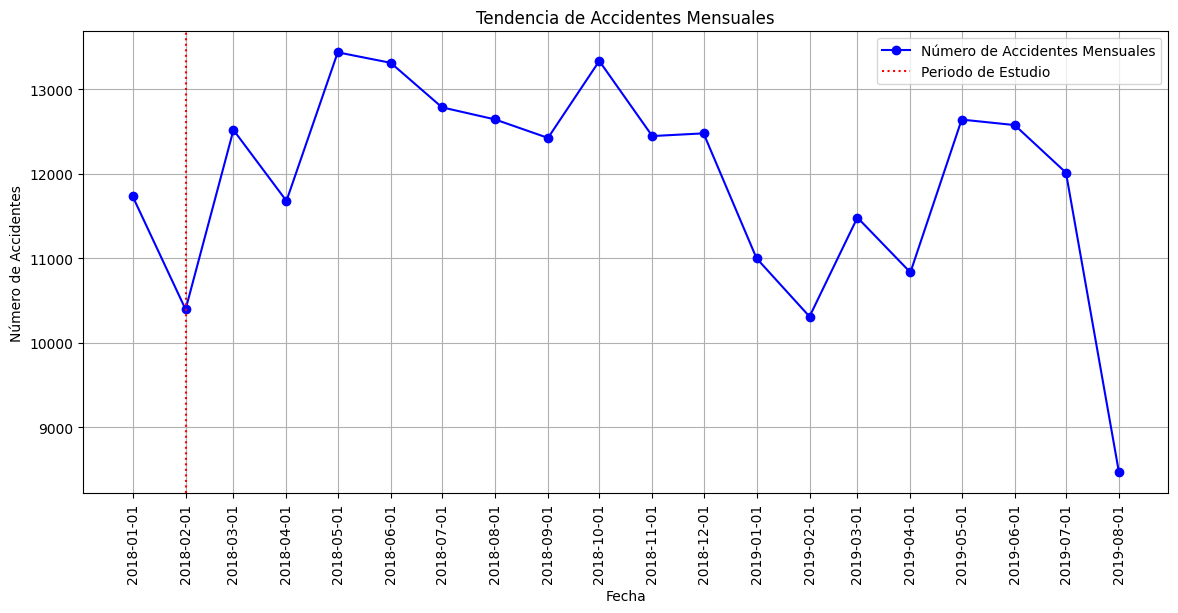

In [ ]:
# Solución propuesta ejercico 2

data_ejer2 = df.copy()
data_ejer2['DATE'] = pd.to_datetime(data_ejer2['DATE']) #conversión en formato datetime
agrup_mensual = data_ejer2.groupby(data_ejer2['DATE'].dt.to_period('M')).size()#Agrupar accidentes por mes
agrup_mensual.index = agrup_mensual.index.to_timestamp()# Convierte el indice agrupado en fechas exactas
#display(agrup_mensual)

#GRÁFICA

plt.figure(figsize=(14, 6))
plt.plot(agrup_mensual.index, agrup_mensual, marker='o', linestyle='-', color='b', label="Número de Accidentes Mensuales")
plt.axvline(agrup_mensual.index[-19],color ='r',linestyle=':',label='Periodo de Estudio')
plt.xticks(agrup_mensual.index,rotation = 90 )
plt.xlabel("Fecha")
plt.ylabel("Número de Accidentes")
plt.title("Tendencia de Accidentes Mensuales")
plt.legend()
plt.grid(True)
plt.show()

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior,
 1. ¿qué meses parecen tener el menor número de accidentes?
Febrero 2018 - Febrero 2019, exceptuando la información del 2019-08 dado que puede deberse a  recolección incompleta de datos dada la extracción para el Analisis.  
 2. ¿Cuáles crees que son las razones detrás de esto?
Esto puede ocurrir debido a que en estos meses se esta en invierno en la ciudad de Nueva York, y debido a las condiciones climaticas asociadas, se genera que haya menor trafico, menor velocidad promedio y un manejo mas defensivo por parte de los conductores.

### Exjercicio 3: ¿Cómo varía el número de accidentes a lo largo de un solo día?

In [ ]:
# se crea una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.
df_Mod = df.copy()
df_Mod["DATE_TIME"] = df_Mod["DATE"] +" "+ df_Mod["TIME"] + ":00"
df_Mod["HOUR"] = pd.to_datetime(df_Mod["DATE_TIME"]).dt.hour
# df_Mod[["DATE","TIME","DATE_TIME","HOUR"]] # Verificacion de la Transformacion
df_InfpPlot = df_Mod.groupby("HOUR").count()["COLLISION_ID"]
df_InfpPlot # como Resultado de la agrupacion es onj de Tipo Serie donde lla llave es Fecha Periodo  y el Valor es la cantidad de Colisiones.

,COLLISION_ID
HOUR,
0,8160
1,3460
2,2570
3,2302
4,2562
5,2878
6,4844
7,7399
8,13403


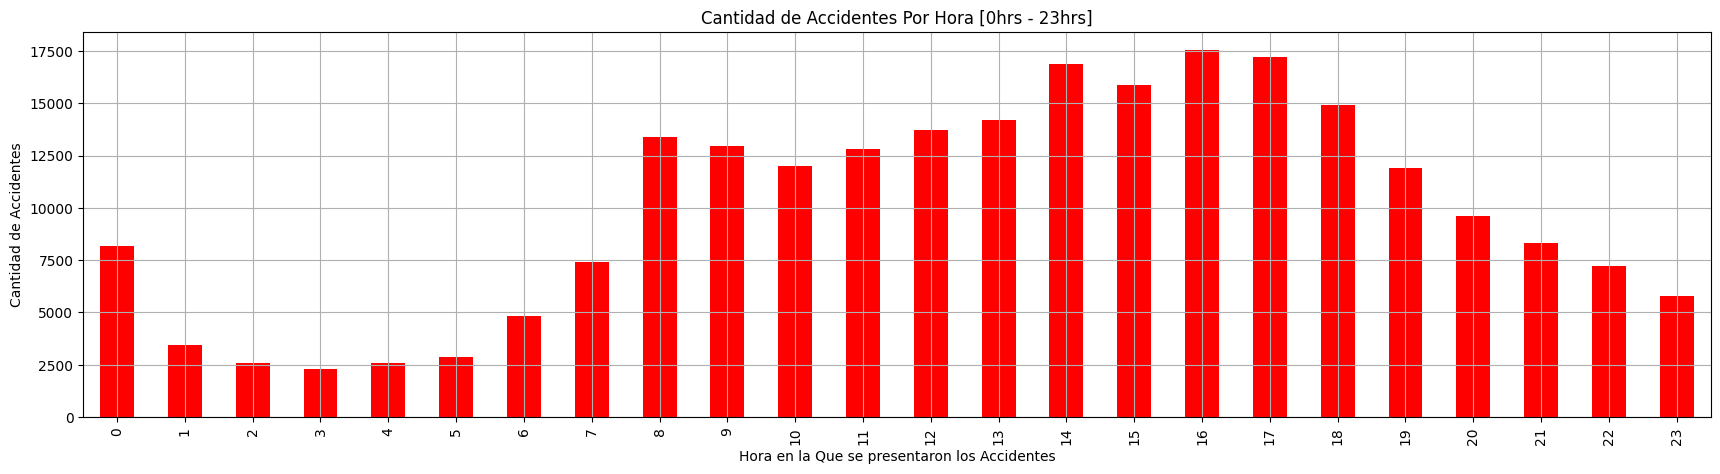

In [ ]:
plt.figure(figsize=(21, 5))
df_InfpPlot.plot(kind="bar", color='r')
plt.xlabel("Hora en la Que se presentaron los Accidentes")
plt.ylabel("Cantidad de Accidentes")
plt.title("Cantidad de Accidentes Por Hora [0hrs - 23hrs]")
plt.grid()

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron.

Permite analizar cual es el Horario mas Frecuente en el que se presentaron los Accidentes desde Enero del 2018 a Agosto del 2019.

### Ejercicio 4:¿Cómo varía el número de accidentes en una sola semana?

In [ ]:
df_Mod = df.copy()
df_Mod["DATE_TIME"] = df_Mod["DATE"] +" "+ df_Mod["TIME"] + ":00"
df_Mod["WEEKDAY"] = pd.to_datetime(df_Mod["DATE_TIME"]).dt.weekday
# df_Mod[["DATE","TIME","DATE_TIME","HOUR"]] # Verificacion de la Transformacion
df_InfpPlot = df_Mod.groupby("WEEKDAY").count()["COLLISION_ID"]
df_InfpPlot # como Resultado de la agrupacion es onj de Tipo Serie donde lla llave es Fecha Periodo  y el Valor es la cantidad de Colisiones.

,COLLISION_ID
WEEKDAY,
0,34719
1,35651
2,35188
3,36254
4,37886
5,31784
6,27040


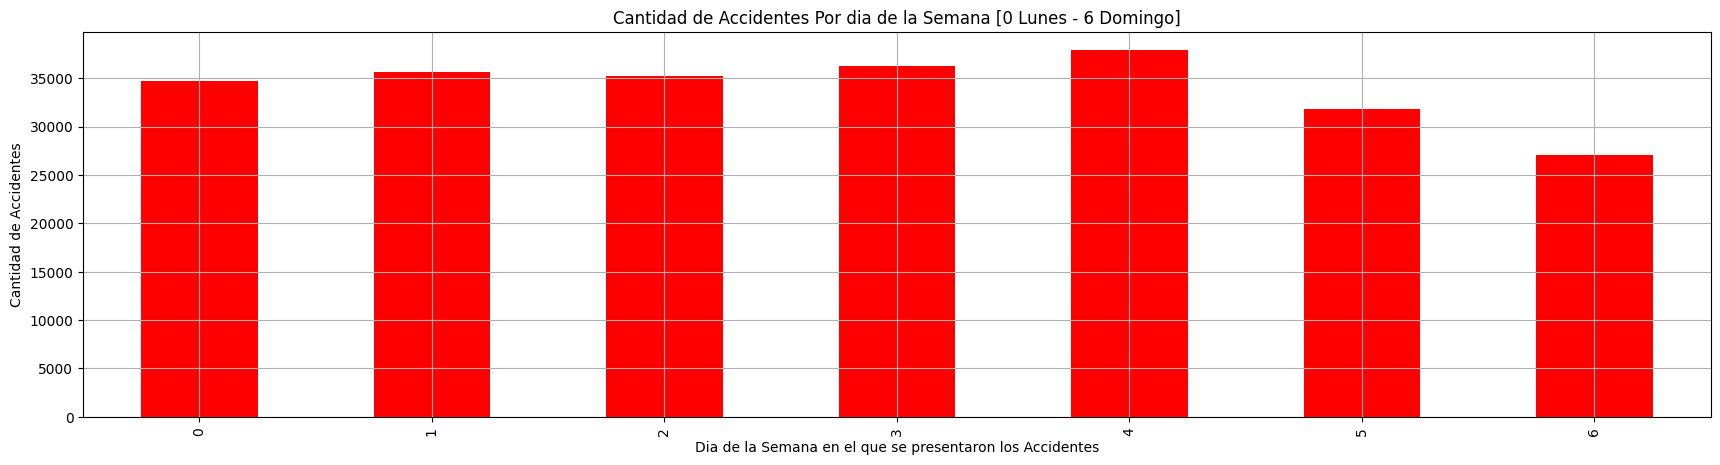

In [ ]:
plt.figure(figsize=(21, 5))
df_InfpPlot.plot(kind="bar", color='r')
plt.xlabel("Dia de la Semana en el que se presentaron los Accidentes")
plt.ylabel("Cantidad de Accidentes")
plt.title("Cantidad de Accidentes Por dia de la Semana [0 Lunes - 6 Domingo]")
plt.grid()

### Ejercicio 5: Cual es número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio.

<ipython-input-40-0a83ace96ac0>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(accidentes_por_municipio.index, rotation=45)
<ipython-input-40-0a83ace96ac0>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(accidentes_por_millacuadrada.index, rotation=45)


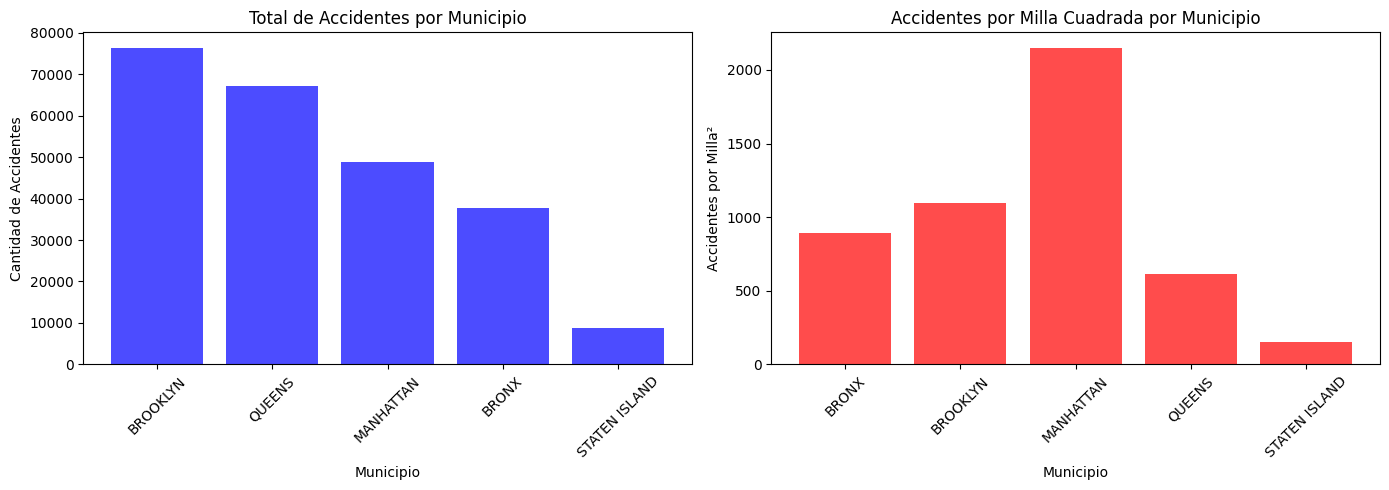

In [ ]:
# Solución propuesta ejercicio 5
data_ejer5 = df.copy()
accidentes_por_municipio = data_ejer5['BOROUGH'].value_counts()
area = {
"BRONX": 42.2,
"BROOKLYN": 69.4,
"MANHATTAN": 22.7,
"QUEENS": 108.7,
"STATEN ISLAND": 57.5
}
accidentes_por_millacuadrada = accidentes_por_municipio / pd.Series(area)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de número total de accidentes por municipio
axes[0].bar(accidentes_por_municipio.index, accidentes_por_municipio.values, color='blue', alpha=0.7)
axes[0].set_title("Total de Accidentes por Municipio")
axes[0].set_xlabel("Municipio")
axes[0].set_ylabel("Cantidad de Accidentes")
axes[0].set_xticklabels(accidentes_por_municipio.index, rotation=45)

# Gráfico de accidentes por milla cuadrada
axes[1].bar(accidentes_por_millacuadrada.index, accidentes_por_millacuadrada.values, color='red', alpha=0.7)
axes[1].set_title("Accidentes por Milla Cuadrada por Municipio")
axes[1].set_xlabel("Municipio")
axes[1].set_ylabel("Accidentes por Milla²")
axes[1].set_xticklabels(accidentes_por_millacuadrada.index, rotation=45)

# Mostrar gráficos
plt.tight_layout()
plt.show()

**Respuesta** : Por milla cuadrada los municipios que más accidentes tienes son Manhattan y Brooklyn

### Ejercicio 6:¿Qué horas tienen más accidentes en cada municipio?

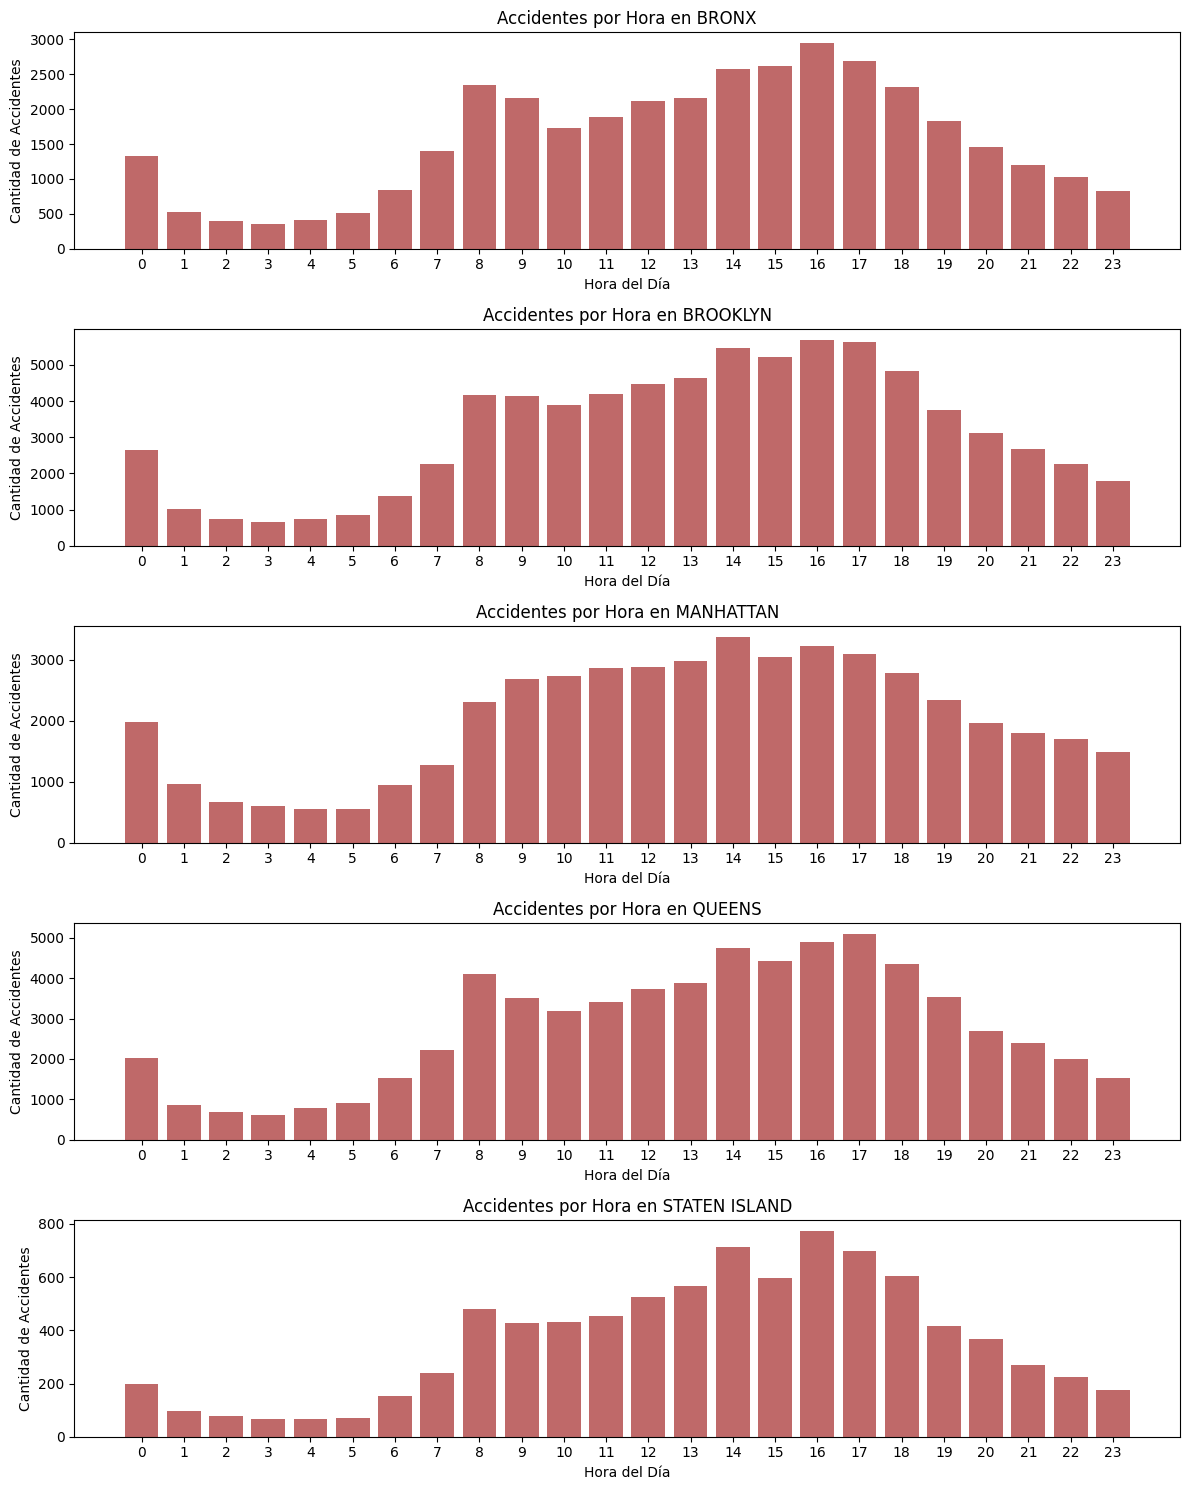

In [ ]:
# Solución propuesta
data_ejer6 = df.copy()
data_ejer6 ['DATE'] = pd.to_datetime(data_ejer6['DATE'])
data_ejer6 ['DATE'] = pd.to_datetime(data_ejer6['DATE'], format='%H:%M')
data_ejer6 ['TIME'] = pd.to_datetime(data_ejer6['TIME'],format='%H:%M')
data_ejer6 ['HOUR'] = data_ejer6['TIME'].dt.hour
#display(data_ejer6)
accidentes_por_municipio_hora = data_ejer6.groupby(['BOROUGH', 'HOUR']).size().unstack(fill_value=0)

# Graficar un gráfico de barras por cada municipio
fig, axes = plt.subplots(nrows=len(accidentes_por_municipio_hora.index), figsize=(12, 15))

# Iterar sobre cada municipio y generar su gráfico de barras
for ax, (borough, data) in zip(axes, accidentes_por_municipio_hora.iterrows()):
    ax.bar(data.index, data.values, color='brown', alpha=0.7)
    ax.set_title(f"Accidentes por Hora en {borough}")
    ax.set_xlabel("Hora del Día")
    ax.set_ylabel("Cantidad de Accidentes")
    ax.set_xticks(range(0, 24))  # Asegurar que se muestren todas las horas

plt.tight_layout()
plt.show()

**Respuesta** : las horas del día en las que encontramos la mayor cantidad de accidenes son entre las 14 y las 18 las 2:00 pm y las 6.00 pm

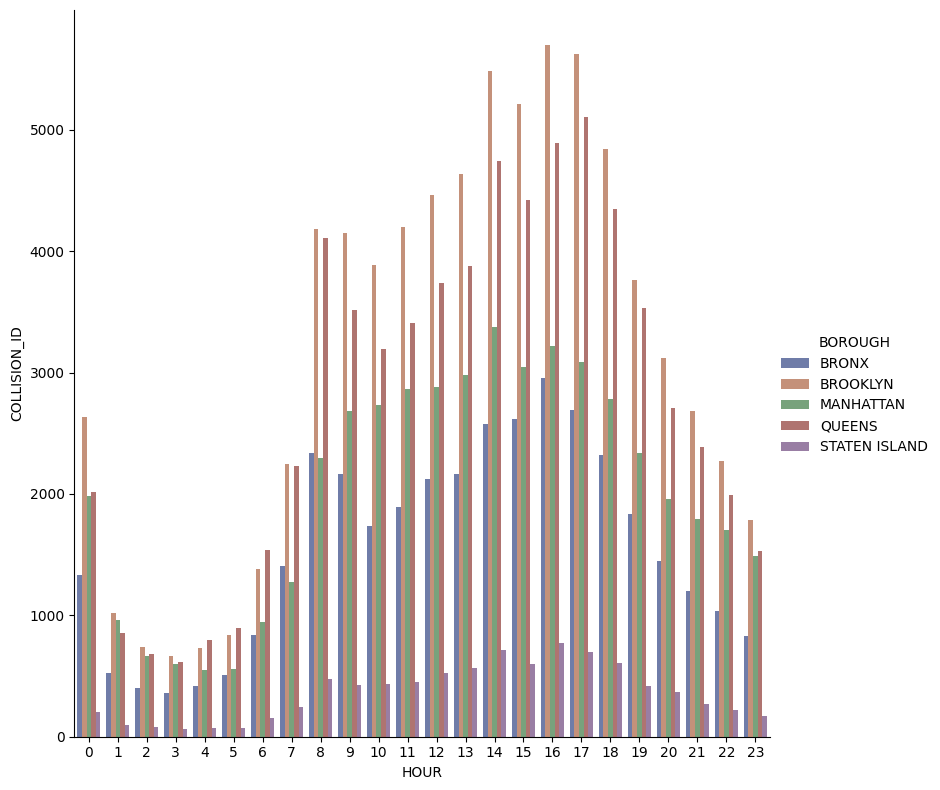

In [ ]:
df_Mod = df.copy()
df_Mod["DATE_TIME"] = df_Mod["DATE"] +" "+ df_Mod["TIME"] + ":00"
df_Mod["HOUR"] = pd.to_datetime(df_Mod["DATE_TIME"]).dt.hour
# df_Mod[["DATE","TIME","DATE_TIME","HOUR"]] # Verificacion de la Transformacion
df_InfpPlot = df_Mod.groupby(["BOROUGH","HOUR"]).count()["COLLISION_ID"]
df_InfpPlot=df_InfpPlot.reset_index()
df_InfpPlot # como Resultado de la agrupacion es onj de Tipo Serie donde lla llave es Fecha Periodo  y el Valor es la cantidad de Colisiones.

sns.catplot(data=df_InfpPlot, kind="bar", x="HOUR", y="COLLISION_ID", hue="BOROUGH" , palette="dark", alpha=.6, height=8)



¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos?

Para todos los muniipios se presenta el mismo comportamiento a travez de las hrs del dia como por ejm  en horas de la madurgada  son muy bajos la cantidad de accidentes y se va incrmentando gradualmente hasta llegar a su pico mas alto hacia las 5 a 7 de la tarde, claro esto guardando las prpociones de accidentes en cada municipio.

¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

Totalmente Deacuerdo dado que hay municipios con mayor accidentalidad que otros.

### Ejercicio 7:¿Qué factores provocan la mayoría de los accidentes?

In [ ]:
df_resp7 = df.copy()

concatenar = pd.concat([df_resp7['CONTRIBUTING_FACTOR_VEHICLE_1'], df_resp7['CONTRIBUTING_FACTOR_VEHICLE_2'], df_resp7['CONTRIBUTING_FACTOR_VEHICLE_3']
                       ,df_resp7['CONTRIBUTING_FACTOR_VEHICLE_4'], df_resp7['CONTRIBUTING_FACTOR_VEHICLE_5']])

df_unico = pd.DataFrame(concatenar, columns=['CONTRIBUTING_FACTOR']).reset_index()
df_unico.rename(columns={'index': 'original_index'}, inplace=True)
df_punto7 = df_unico.groupby('CONTRIBUTING_FACTOR')['original_index'].nunique().reset_index()
df_punto7.rename(columns={'original_index': 'COUNT_COLLISION_ID'}, inplace=True)
#print(df_punto7)

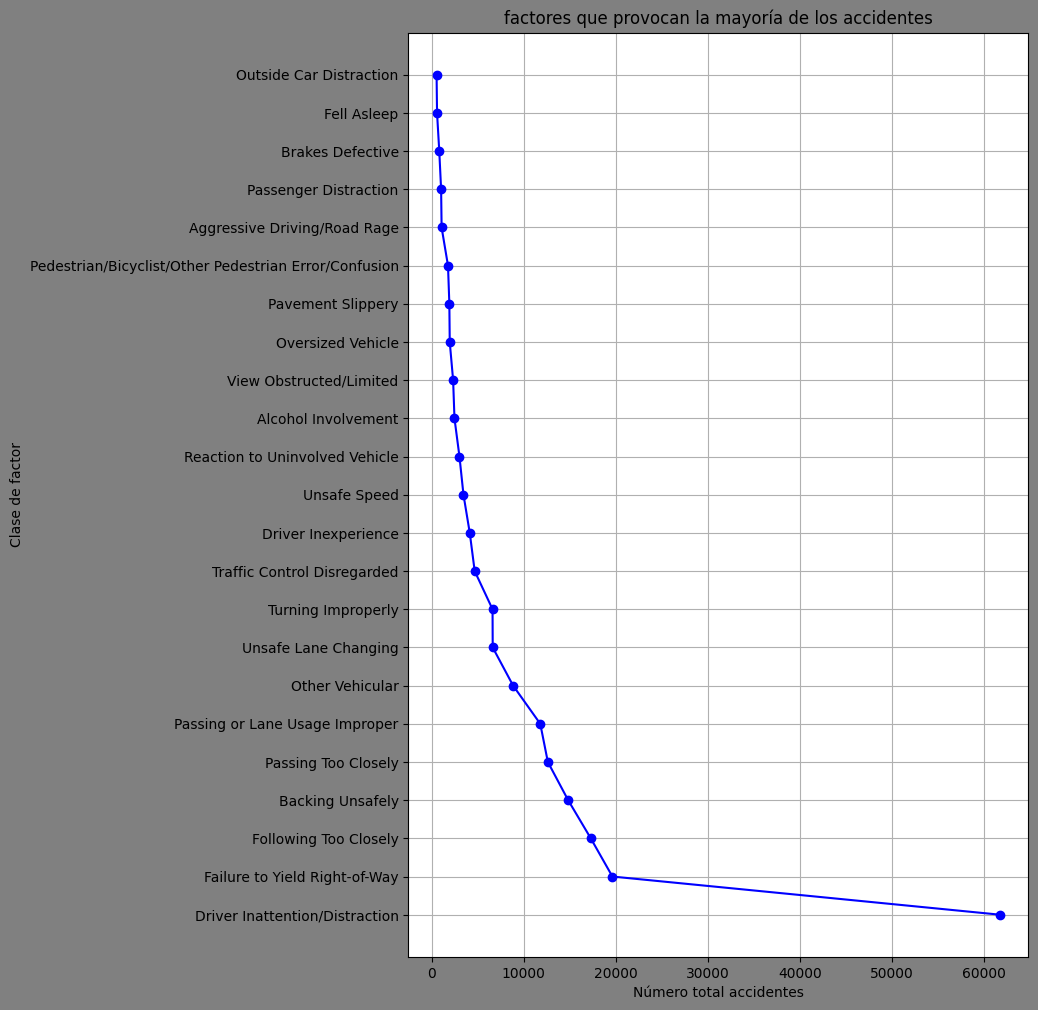

In [ ]:

df_line = df_punto7[df_punto7['CONTRIBUTING_FACTOR'] != 'Unspecified']
df_line2 = df_line[df_line["COUNT_COLLISION_ID"] > 500]
df_line3 = df_line2.sort_values(by='COUNT_COLLISION_ID', ascending=False)


x = df_line3.COUNT_COLLISION_ID
y = df_line3.CONTRIBUTING_FACTOR

plt.figure(figsize=(8, 12),facecolor = "Gray")


plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xlabel("Número total accidentes")
plt.ylabel("Clase de factor")
plt.title("factores que provocan la mayoría de los accidentes")
plt.grid()
plt.show()

### Ejercicio 8:¿Qué tipos de vehículos están más involucrados en accidentes por municipio?

In [ ]:
df_unpivot = pd.melt(df,
                  id_vars=['COLLISION_ID','BOROUGH'],
                  value_vars=['VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2', 'VEHICLE_TYPE_CODE_3','VEHICLE_TYPE_CODE_4','VEHICLE_TYPE_CODE_5'],
                  var_name='VEHICLE_TYPE_CODE',
                  value_name='VEHICLE_TYPE')

df_unpivot= df_unpivot[df_unpivot["VEHICLE_TYPE"] != 'Unspecified'].drop_duplicates()
dfTop10  = df_unpivot.groupby("VEHICLE_TYPE").count()["COLLISION_ID"].sort_values(ascending=False).head(10).reset_index()
#dfTop10

In [ ]:
dfMunicipiosTop5  = df_unpivot.groupby(["BOROUGH","VEHICLE_TYPE"]).count()["COLLISION_ID"].reset_index()
dfMunicipiosTop5.sort_values(by=["BOROUGH", "COLLISION_ID"], ascending=[True, False], inplace=True)
dfMunicipiosTop5 = dfMunicipiosTop5.groupby("BOROUGH").head(5).reset_index(drop=True)
dfMunicipiosTop5

,BOROUGH,VEHICLE_TYPE,COLLISION_ID
0,BRONX,UnspeciUnknownfied,121105
1,BRONX,Sedan,25714
2,BRONX,Station Wagon/Sport Utility Vehicle,19185
3,BRONX,PASSENGER VEHICLE,6421
4,BRONX,SPORT UTILITY / STATION WAGON,4643
5,BROOKLYN,UnspeciUnknownfied,242370
6,BROOKLYN,Sedan,51983
7,BROOKLYN,Station Wagon/Sport Utility Vehicle,40895
8,BROOKLYN,PASSENGER VEHICLE,13480
9,BROOKLYN,SPORT UTILITY / STATION WAGON,10124


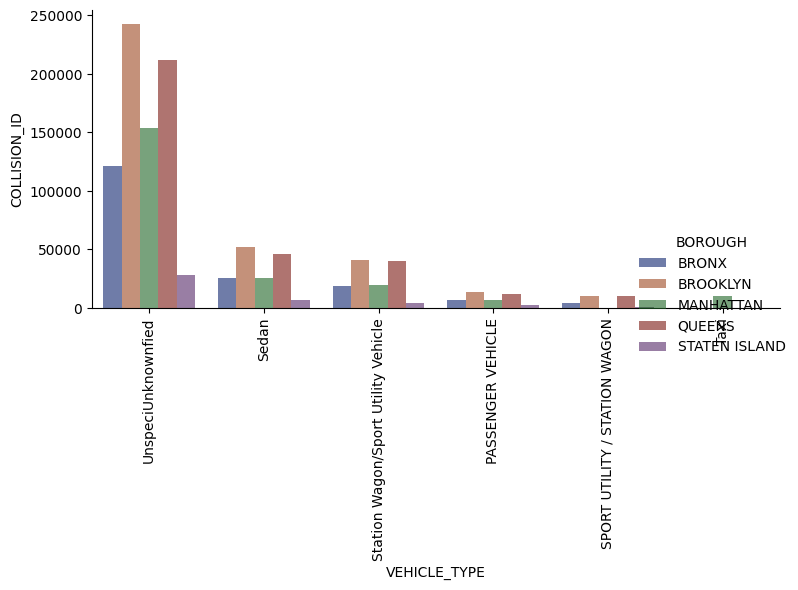

In [ ]:
grafic = sns.catplot(data=dfMunicipiosTop5, kind="bar", x="VEHICLE_TYPE", y="COLLISION_ID", hue="BOROUGH", palette="dark", alpha=.6, height=7)
grafic.figure.set_size_inches(8, 6)
grafic.set_xticklabels(rotation=90)
#plt.tight_layout()

### Ejercicio 9: Analisis integral

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [X] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

>> **Recomendación**:  se evidencia que para los Peatones y Ciclistas qye estuvieron involucrados aumentaron las causas de los accidentes para el primer Trimestre del 2019 vs 2018 dado que en el 2018 se presentaban 6 causan y para el 2019 se presentan 9 siendo la mas predominante [Dalta de Atención delk Conductor/Distracciones] para esto se podria reforzar los Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

In [ ]:
df_Mod = df.copy()
df_Mod["DATE_TIME"] = pd.to_datetime(df_Mod["DATE"] +" "+ df_Mod["TIME"] + ":00")
df_Mod["QUARTER"] = df_Mod["DATE_TIME"].dt.quarter
df_Mod["YEAR"] = df_Mod["DATE_TIME"].dt.year
df_Mod["NUMBER_OF_AFECCTED_P_C"] = df_Mod["NUMBER_OF_CYCLIST_KILLED"] + df_Mod["NUMBER_OF_PEDESTRIANS_KILLED"] + df_Mod["NUMBER_OF_CYCLIST_INJURED"] + df_Mod["NUMBER_OF_PEDESTRIANS_INJURED"]
df_Mod["NUMBER_OF_KILLED_P_C"] = df_Mod["NUMBER_OF_CYCLIST_KILLED"] + df_Mod["NUMBER_OF_PEDESTRIANS_KILLED"]
df_Mod = df_Mod[df_Mod["QUARTER"] == 1]


df_Mod1 = df_Mod[(df_Mod["QUARTER"] == 1) & (df_Mod["NUMBER_OF_KILLED_P_C"] > 0)]

df_unpivot = pd.melt(df_Mod1,
                  id_vars=['COLLISION_ID',"YEAR",'BOROUGH'],
                  value_vars=['CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2', 'CONTRIBUTING_FACTOR_VEHICLE_3','CONTRIBUTING_FACTOR_VEHICLE_4','CONTRIBUTING_FACTOR_VEHICLE_5'],
                  var_name='CONTRIBUTING_FACTOR_VEHICLE',
                  value_name='FACTOR_VEHICLE')

df_unpivot= df_unpivot[df_unpivot["FACTOR_VEHICLE"] != 'Unspecified'].drop_duplicates()
df_unpivot.head(5)

,COLLISION_ID,YEAR,BOROUGH,CONTRIBUTING_FACTOR_VEHICLE,FACTOR_VEHICLE
0,4101585,2019,MANHATTAN,CONTRIBUTING_FACTOR_VEHICLE_1,Alcohol Involvement
1,4095140,2019,BRONX,CONTRIBUTING_FACTOR_VEHICLE_1,Failure to Yield Right-of-Way
2,4093707,2019,STATEN ISLAND,CONTRIBUTING_FACTOR_VEHICLE_1,Failure to Yield Right-of-Way
3,4096754,2019,QUEENS,CONTRIBUTING_FACTOR_VEHICLE_1,Traffic Control Disregarded
6,4080764,2019,BRONX,CONTRIBUTING_FACTOR_VEHICLE_1,Failure to Yield Right-of-Way


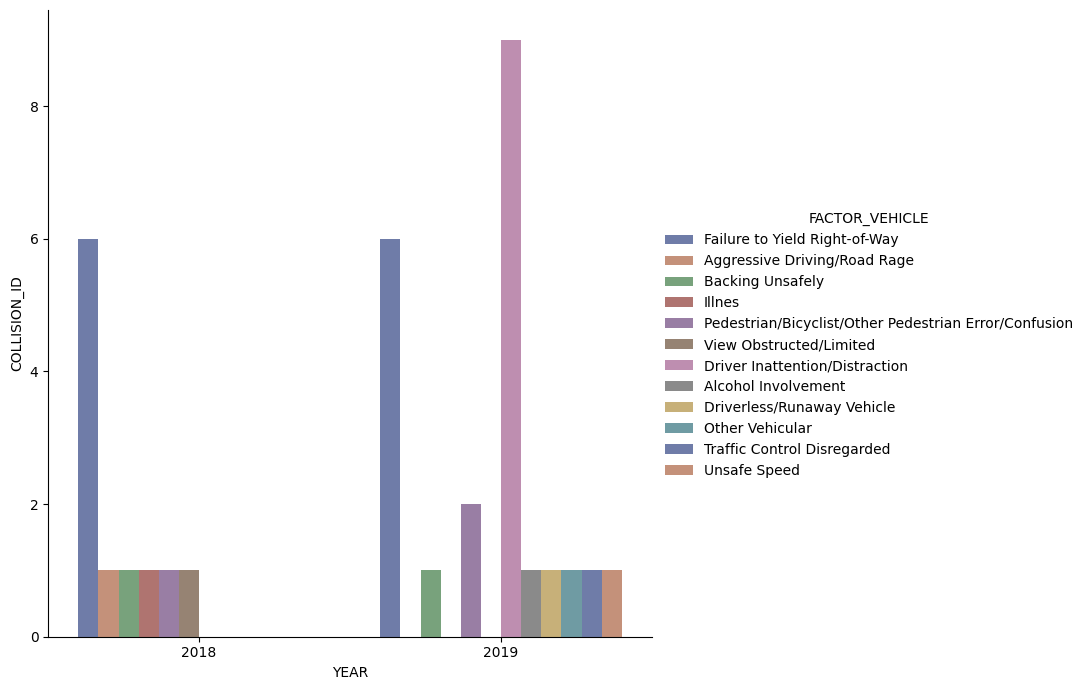

In [ ]:

df_groupPlot = df_unpivot.groupby(["YEAR","FACTOR_VEHICLE"])["COLLISION_ID"].count().reset_index().sort_values(["YEAR","COLLISION_ID"], ascending=False).reset_index().drop(columns=["index"])
sns.catplot(data=df_groupPlot, kind="bar", x="YEAR", y="COLLISION_ID", hue="FACTOR_VEHICLE" , palette="dark", alpha=.6, height=7)
# g = sns.FacetGrid(df_groupPlot, col="YEAR" , row="FACTOR_VEHICLE" )
# g.map(sns.histplot, "COLLISION_ID")
# g.add_legend()

In [ ]:
df_fil = df_Mod[(df_Mod["ON_STREET_NAME"] != "UNKNOWN") & (df_Mod["NUMBER_OF_AFECCTED_P_C"] > 0)]
df_fil = df_fil[["COLLISION_ID","YEAR","ON_STREET_NAME"]].groupby(["YEAR","ON_STREET_NAME"]).count().sort_values(by="COLLISION_ID", ascending=False).reset_index()
df_fil = df_fil.groupby("YEAR").head(20)
df_fil

,YEAR,ON_STREET_NAME,COLLISION_ID
0,2018,BROADWAY,34
1,2019,BROADWAY,28
2,2018,3 AVENUE,25
3,2019,2 AVENUE,23
4,2018,NORTHERN BOULEVARD,23
5,2019,3 AVENUE,21
6,2019,1 AVENUE,18
7,2019,ATLANTIC AVENUE,18
8,2018,1 AVENUE,18
9,2018,2 AVENUE,17


<Axes: xlabel='ON_STREET_NAME', ylabel='YEAR'>

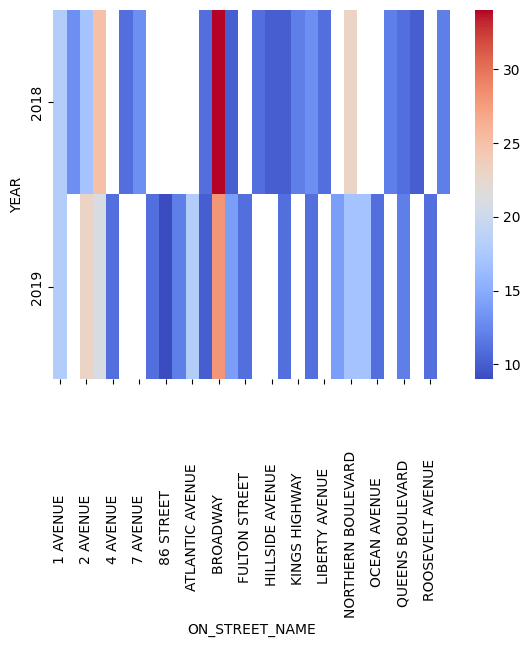

In [ ]:
df_fil_pivot = df_fil.pivot(index="YEAR", columns="ON_STREET_NAME", values="COLLISION_ID")
sns.heatmap(df_fil_pivot , cmap='coolwarm')

### Ejercicio 10: Número de muertes provocadas por cada tipo de vehículo.

In [ ]:
df_Mod = df.copy()
df_Mod["NUMBER_OF_KILLED_P_C_M"] = df_Mod["NUMBER_OF_CYCLIST_KILLED"] + df_Mod["NUMBER_OF_PEDESTRIANS_KILLED"] + df_Mod["NUMBER_OF_MOTORIST_KILLED"]

df_Mod = df_Mod[df_Mod["NUMBER_OF_KILLED_P_C_M"]>0]

df_unpivot = pd.melt(df_Mod,
                  id_vars=['COLLISION_ID','BOROUGH',"NUMBER_OF_KILLED_P_C_M"],
                  value_vars=["VEHICLE_TYPE_CODE_1","VEHICLE_TYPE_CODE_2","VEHICLE_TYPE_CODE_3","VEHICLE_TYPE_CODE_4","VEHICLE_TYPE_CODE_5"],
                  var_name='VEHICLE_TYPE_CODE',
                  value_name='VEHICLE_TYPE')

df_unpivot.drop(columns=["VEHICLE_TYPE_CODE"], inplace=True)
df_unpivot = df_unpivot[df_unpivot["VEHICLE_TYPE"] != "UnspeciUnknownfied"]
df_unpivot_agg = df_unpivot.groupby("VEHICLE_TYPE").agg({"COLLISION_ID": "count", "NUMBER_OF_KILLED_P_C_M": "sum"}).reset_index()
df_unpivot_agg


,VEHICLE_TYPE,COLLISION_ID,NUMBER_OF_KILLED_P_C_M
0,BICYCLE,3,3
1,BU,2,2
2,Beverage Truck,1,1
3,Bike,19,19
4,Box Truck,8,8
5,Bus,10,10
6,Concrete Mixer,2,2
7,Convertible,1,1
8,Dump,3,3
9,E SCO,1,1


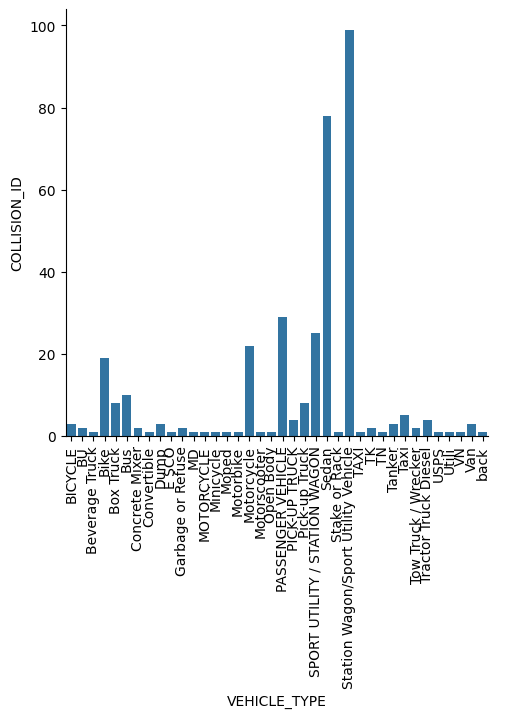

In [ ]:
grafic = sns.catplot(data=df_unpivot_agg, kind="bar", x="VEHICLE_TYPE", y="COLLISION_ID")
grafic.set_xticklabels(rotation=90)